# Visualising Query Results from OSM and Nominatim

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from OSMPythonTools.nominatim import Nominatim

In [2]:
queries = ['Lockheed Martin',
'Airbus',
'Boeing',
'Rheinmetall Defence',
'General Dynamics',
'Leonardo',
'Rolls Royce',
'L3Harris',
'Krauss-Maffei Wegmann']

nominatim = Nominatim()

In [3]:
result = []
for query in queries:
    OSM_query = nominatim.query(query).toJSON()
    result += OSM_query

In [4]:
# Check single query result
result[0]

{'place_id': 73062617,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'osm_type': 'node',
 'osm_id': 6309492410,
 'boundingbox': ['37.4052236', '37.4152236', '-122.0318833', '-122.0218833'],
 'lat': '37.4102236',
 'lon': '-122.0268833',
 'display_name': 'Lockheed Martin, North Mathilda Avenue, Sunnyvale, Santa Clara County, California, 94089, United States of America',
 'class': 'railway',
 'type': 'station',
 'importance': 0.5168930617533198,
 'icon': 'https://nominatim.openstreetmap.org/images/mapicons/transport_train_station2.p.20.png'}

In [5]:
# Analyse data
df = pd.DataFrame.from_records(result)
df

,place_id,licence,osm_type,osm_id,boundingbox,lat,lon,display_name,class,type,importance,icon
0,73062617,"Data © OpenStreetMap contributors, ODbL 1.0. h...",node,6309492410,"[37.4052236, 37.4152236, -122.0318833, -122.02...",37.4102236,-122.0268833,"Lockheed Martin, North Mathilda Avenue, Sunnyv...",railway,station,0.516893,https://nominatim.openstreetmap.org/images/map...
1,186830511,"Data © OpenStreetMap contributors, ODbL 1.0. h...",way,461990541,"[28.4393629, 28.4498899, -81.4663807, -81.4502...",28.444419449999998,-81.45939724481775,"Lockheed Martin, Orange County, Florida, Unite...",landuse,industrial,0.400000,NaN
2,233040507,"Data © OpenStreetMap contributors, ODbL 1.0. h...",way,751754734,"[34.6091892, 34.6201411, -118.1216872, -118.10...",34.61462425,-118.1176553123895,"Lockheed Martin, Palmdale, Los Angeles County,...",landuse,commercial,0.400000,NaN
3,110665459,"Data © OpenStreetMap contributors, ODbL 1.0. h...",way,104556885,"[52.0425106, 52.0482611, -0.4977645, -0.491177]",52.045457,-0.49518393513989056,"Lockheed Martin, Houghton Conquest, Ampthill, ...",landuse,commercial,0.400000,NaN
4,108613516,"Data © OpenStreetMap contributors, ODbL 1.0. h...",way,97858770,"[43.099489, 43.1076352, -78.9366766, -78.927114]",43.105438,-78.93016382992954,"Lockheed Martin, Walmore, Wheatfield Town, Nia...",landuse,industrial,0.400000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
63,204075159,"Data © OpenStreetMap contributors, ODbL 1.0. h...",way,562749763,"[51.1317567, 51.1325072, -0.1701069, -0.1690282]",51.13213705,-0.16957515272839274,"L3Harris, Gatwick Road, OakWood Trade Park, Cr...",building,commercial,0.111000,NaN
64,204012691,"Data © OpenStreetMap contributors, ODbL 1.0. h...",way,562749762,"[51.1324927, 51.1333568, -0.1706682, -0.1694562]",51.13293145,-0.17006651167800912,"L3Harris, Crawter's Brook Park, Crawley, West ...",building,commercial,0.111000,NaN
65,147601193,"Data © OpenStreetMap contributors, ODbL 1.0. h...",way,253085542,"[51.3217183, 51.3231126, 9.4905494, 9.4917967]",51.32252545,9.491076786172702,"69, Nord (Holland), Kassel, Hessen, 34117, Deu...",landuse,industrial,0.200000,NaN
66,148841391,"Data © OpenStreetMap contributors, ODbL 1.0. h...",way,258510560,"[51.3217784, 51.3247942, 9.4961558, 9.4999543]",51.323279549999995,9.498461373412969,"32-40, Nord (Holland), Kassel, Hessen, 34127, ...",landuse,industrial,0.200000,NaN


In [6]:
# Analyse columns
df.columns.tolist()

['place_id',
 'licence',
 'osm_type',
 'osm_id',
 'boundingbox',
 'lat',
 'lon',
 'display_name',
 'class',
 'type',
 'importance',
 'icon']

In [7]:
pd.DataFrame(df["class"].apply(pd.Series)[0].value_counts())

,0
landuse,24
highway,15
building,10
place,7
office,3
amenity,2
man_made,2
tourism,2
boundary,1
railway,1


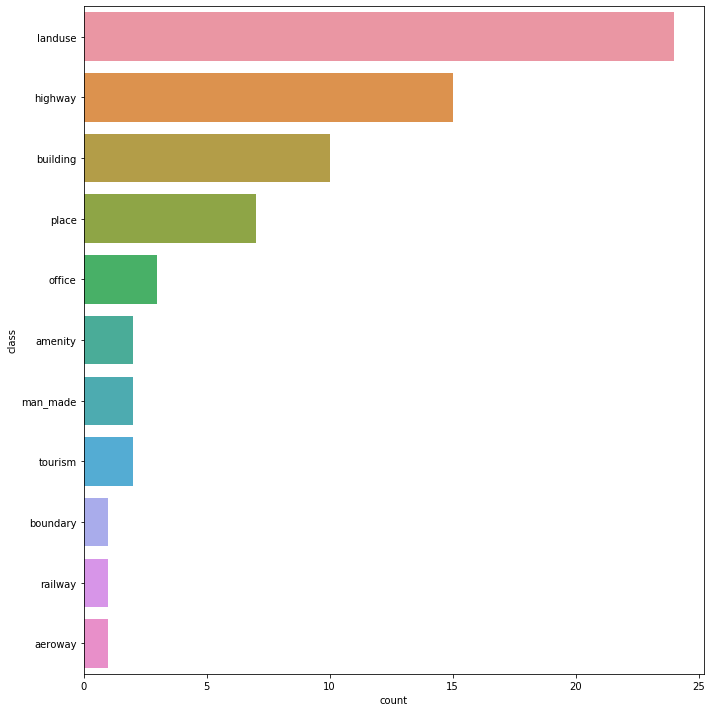

In [8]:
# Visualing class types
loc_classes = pd.DataFrame(df["class"].apply(pd.Series)[0].value_counts().reset_index())
loc_classes.columns = ["class", "count"]
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(y="class", x="count", data=loc_classes, ax=ax)
plt.tight_layout()

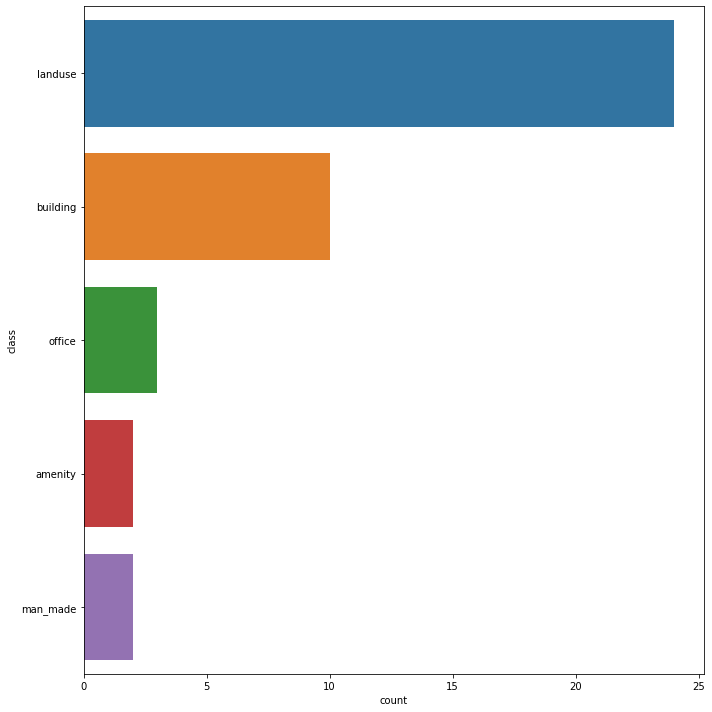

In [9]:
# Remove classes that are definitely unneeded
unneeded_classes = ['highway', 'place', 'tourism', 'boundary', 'railway', 'aeroway']
df = df[df['class'].isin(unneeded_classes) == False]

# Re-visualing loc classes
loc_classes = pd.DataFrame(df["class"].apply(pd.Series)[0].value_counts().reset_index())
loc_classes.columns = ["class", "count"]
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(y="class", x="count", data=loc_classes, ax=ax)
plt.tight_layout()

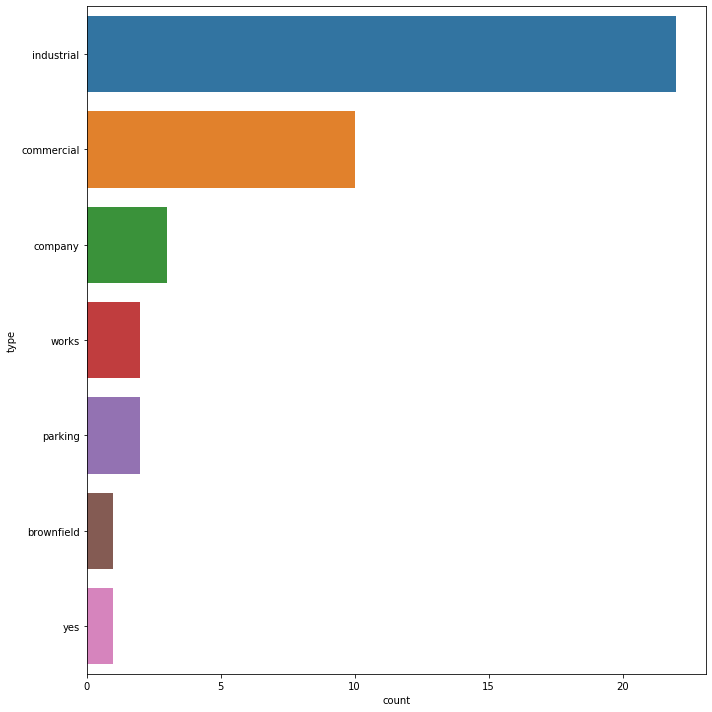

In [10]:
# Visualing loc types
loc_types = pd.DataFrame(df["type"].apply(pd.Series)[0].value_counts().reset_index())
loc_types.columns = ["type", "count"]
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(y="type", x="count", data=loc_types, ax=ax)
plt.tight_layout()

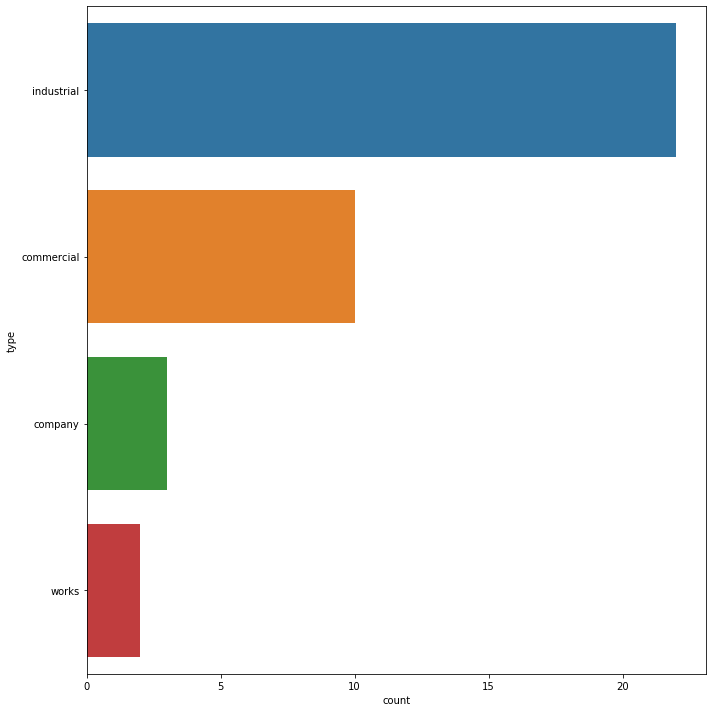

In [11]:
# Remove types that are definitely unneeded
unneeded_types = ['parking', 'yes', 'brownfield']
df = df[df['type'].isin(unneeded_types) == False]

# Re-visualing loc types
loc_types = pd.DataFrame(df["type"].apply(pd.Series)[0].value_counts().reset_index())
loc_types.columns = ["type", "count"]
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(y="type", x="count", data=loc_types, ax=ax)
plt.tight_layout()

# Testing python helper function to get mapping

In [12]:
from geolocation_mapper import get_geolocation_mapping 

In [13]:
import pytest

with pytest.raises(ValueError):
    mapping = get_geolocation_mapping("")

with pytest.raises(ValueError):
    mapping = get_geolocation_mapping()
    
assert(get_geolocation_mapping('Airbus') != None)

assert(get_geolocation_mapping('Krauss-Maffei Wegmann') != None)

In [14]:
# Test all Queries
for query in queries:
    mapping = get_geolocation_mapping(query)
    print(query + " Geolocations:")
    for geo_loc in mapping:
        print("Lat: {:<20s} \tLon: {:<20s}".format(geo_loc['lat'], geo_loc['lon']))

    print("\n")

Lockheed Martin Geolocations:
Lat: 28.444419449999998   	Lon: -81.45939724481775  
Lat: 34.61462425          	Lon: -118.1176553123895  
Lat: 52.045457            	Lon: -0.49518393513989056
Lat: 43.105438            	Lon: -78.93016382992954  
Lat: 39.030891499999996   	Lon: -77.13876633194991  
Lat: 39.50599855          	Lon: -105.11360240865616 
Lat: 34.72721385          	Lon: -86.649203820559    


Airbus Geolocations:
Lat: 53.6187258           	Lon: 9.995376396325499   
Lat: 43.65274885          	Lon: 1.356780913545912   
Lat: 44.55276375          	Lon: -0.23717808690619216
Lat: 51.513034250000004   	Lon: -2.5775447515268164 
Lat: 53.16591135          	Lon: -3.0566938232321137 


Boeing Geolocations:
Lat: 29.59173615          	Lon: -95.099817235868    
Lat: 39.86609405          	Lon: -75.3239071379754   
Lat: 34.726048399999996   	Lon: -86.67427209860197  


Rheinmetall Defence Geolocations:
Lat: 48.29289545          	Lon: 8.576557026082067   


General Dynamics Geolocations:
Lat: 32